In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3 as sql

In [3]:
conn = sql.connect("./imdb_dataset/movies.sqlite")

cur = conn.cursor()
movies = cur.execute("SELECT * FROM movies") # Get all the movies
print(movies.description) # Get the column names

(('id', None, None, None, None, None, None), ('original_title', None, None, None, None, None, None), ('budget', None, None, None, None, None, None), ('popularity', None, None, None, None, None, None), ('release_date', None, None, None, None, None, None), ('revenue', None, None, None, None, None, None), ('title', None, None, None, None, None, None), ('vote_average', None, None, None, None, None, None), ('vote_count', None, None, None, None, None, None), ('overview', None, None, None, None, None, None), ('tagline', None, None, None, None, None, None), ('uid', None, None, None, None, None, None), ('director_id', None, None, None, None, None, None))


In [4]:
movies =cur.fetchall()

movies_df = pd.DataFrame(movies, columns=['id', 'original_title', 'budget','popularity', 'release_date', 'revenue', 'title', 'vote_average', 'vote_count', 'overview', 'tagline', 'uid', 'director_id' ])

print(movies_df.head())

print(movies_df.info)

      id                            original_title     budget  popularity  \
0  43597                                    Avatar  237000000         150   
1  43598  Pirates of the Caribbean: At World's End  300000000         139   
2  43599                                   Spectre  245000000         107   
3  43600                     The Dark Knight Rises  250000000         112   
4  43601                               John Carter  260000000          43   

  release_date     revenue                                     title  \
0   2009-12-10  2787965087                                    Avatar   
1   2007-05-19   961000000  Pirates of the Caribbean: At World's End   
2   2015-10-26   880674609                                   Spectre   
3   2012-07-16  1084939099                     The Dark Knight Rises   
4   2012-03-07   284139100                               John Carter   

   vote_average  vote_count  \
0           7.2       11800   
1           6.9        4500   
2          

In [5]:
# Find all movies with directors
_cursor = cur.execute('SELECT * FROM directors')

directors = _cursor.fetchall()

directorsDF = pd.DataFrame(directors, columns = ['name', 'id', 'gender', 'uid', 'department'])
directorsDF.head()

,name,id,gender,uid,department
0,James Cameron,4762,2,2710,Directing
1,Gore Verbinski,4763,2,1704,Directing
2,Sam Mendes,4764,2,39,Directing
3,Christopher Nolan,4765,2,525,Directing
4,Andrew Stanton,4766,2,7,Directing


In [6]:
directorsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        2349 non-null   object
 1   id          2349 non-null   int64 
 2   gender      2349 non-null   int64 
 3   uid         2349 non-null   int64 
 4   department  2349 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.9+ KB


In [7]:
# Budget analysis
# Sort from most expensive movie going down.

_cursor = cur.execute('SELECT original_title, name, release_date, budget, revenue FROM movies JOIN directors ON movies.director_id = directors.id ORDER BY budget DESC')
most_expensive = _cursor.fetchall()
most_expensive = pd.DataFrame(most_expensive, columns = ['original_title', 'director_name', 'release_date', 'budget', 'revenue'])
most_expensive.head(10)


,original_title,director_name,release_date,budget,revenue
0,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,2011-05-14,380000000,1045713802
1,Pirates of the Caribbean: At World's End,Gore Verbinski,2007-05-19,300000000,961000000
2,Avengers: Age of Ultron,Joss Whedon,2015-04-22,280000000,1405403694
3,Superman Returns,Bryan Singer,2006-06-28,270000000,391081192
4,John Carter,Andrew Stanton,2012-03-07,260000000,284139100
5,Tangled,Byron Howard,2010-11-24,260000000,591794936
6,Spider-Man 3,Sam Raimi,2007-05-01,258000000,890871626
7,The Lone Ranger,Gore Verbinski,2013-07-03,255000000,89289910
8,The Dark Knight Rises,Christopher Nolan,2012-07-16,250000000,1084939099
9,Harry Potter and the Half-Blood Prince,David Yates,2009-07-07,250000000,933959197


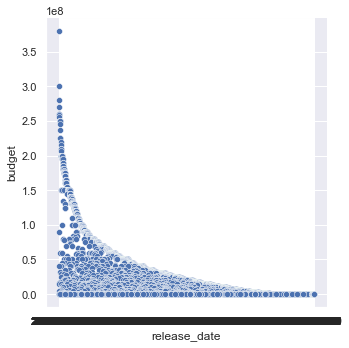

In [8]:
# Plot the movies budgets in a scatter plot with the released dates
sns.set(style="darkgrid")
sns.relplot(x="release_date", y="budget", data=most_expensive)

In [9]:
# Needs to fix the x asis to show released dates.

In [10]:
#Popularity Analysis
cur.execute('SELECT original_title, name, release_date, popularity, revenue FROM movies JOIN directors ON movies.director_id = director_id ORDER BY popularity DESC')
most_popular = cur.fetchall()
most_popular = pd.DataFrame(most_popular, columns =['origin_title', 'director_name', 'release_date', 'popularity', 'revenue'])
print(most_popular.head(10))

  origin_title      director_name release_date  popularity     revenue
0      Minions      James Cameron   2015-06-17         875  1156730962
1      Minions     Gore Verbinski   2015-06-17         875  1156730962
2      Minions         Sam Mendes   2015-06-17         875  1156730962
3      Minions  Christopher Nolan   2015-06-17         875  1156730962
4      Minions     Andrew Stanton   2015-06-17         875  1156730962
5      Minions          Sam Raimi   2015-06-17         875  1156730962
6      Minions       Byron Howard   2015-06-17         875  1156730962
7      Minions        Joss Whedon   2015-06-17         875  1156730962
8      Minions        David Yates   2015-06-17         875  1156730962
9      Minions        Zack Snyder   2015-06-17         875  1156730962


In [11]:
# Rating analysis
cur.execute('SELECT original_title, name, release_date, vote_average, vote_count FROM movies JOIN directors ON movies.director_id = directors.id ORDER BY vote_average DESC')
most_rated_movies = cur.fetchall()
most_rated_movies = pd.DataFrame(most_rated_movies, columns=['original-title', 'director_name', 'release_date', 'vote_average', 'vote_count'])

print(most_rated_movies.head(10))


             original-title         director_name release_date  vote_average  \
0          Stiff Upper Lips           Gary Sinyor   1998-06-12          10.0   
1     Dancer, Texas Pop. 81         Tim McCanlies   1998-05-01          10.0   
2                 Sardaarji          Rohit Jugraj   2015-06-26           9.5   
3            One Man's Hero            Lance Hool   1999-08-02           9.3   
4  The Shawshank Redemption        Frank Darabont   1994-09-23           8.5   
5        There Goes My Baby          Floyd Mutrux   1994-09-02           8.5   
6     The Prisoner of Zenda         John Cromwell   1937-09-03           8.4   
7             The Godfather  Francis Ford Coppola   1972-03-14           8.4   
8                Fight Club         David Fincher   1999-10-15           8.3   
9          Schindler's List      Steven Spielberg   1993-11-29           8.3   

   vote_count  
0           1  
1           1  
2           2  
3           2  
4        8205  
5           2  
6      

In [17]:

#Create a heatmap to show the affect if two movies were voted by 1 person.

sns.set(rc = {'figure.figsize': (8, 8)})
# sns.heatmap(movies[['budget', 'popularity', 'revenue', 'vote_average', 'director_id']].corr(), 
            # annot = True, fmt = '.2f', linewidth = 1)